## Multiple Linear Regression with scikit-learn

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn import linear_model, datasets, metrics, model_selection, feature_selection, preprocessing

from scipy import stats


In [2]:
boston = datasets.load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target


In [3]:
print('shape:', X.shape)

shape: (506, 13)


In [4]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


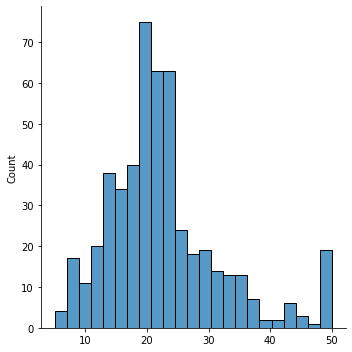

In [5]:
sns.displot(y)

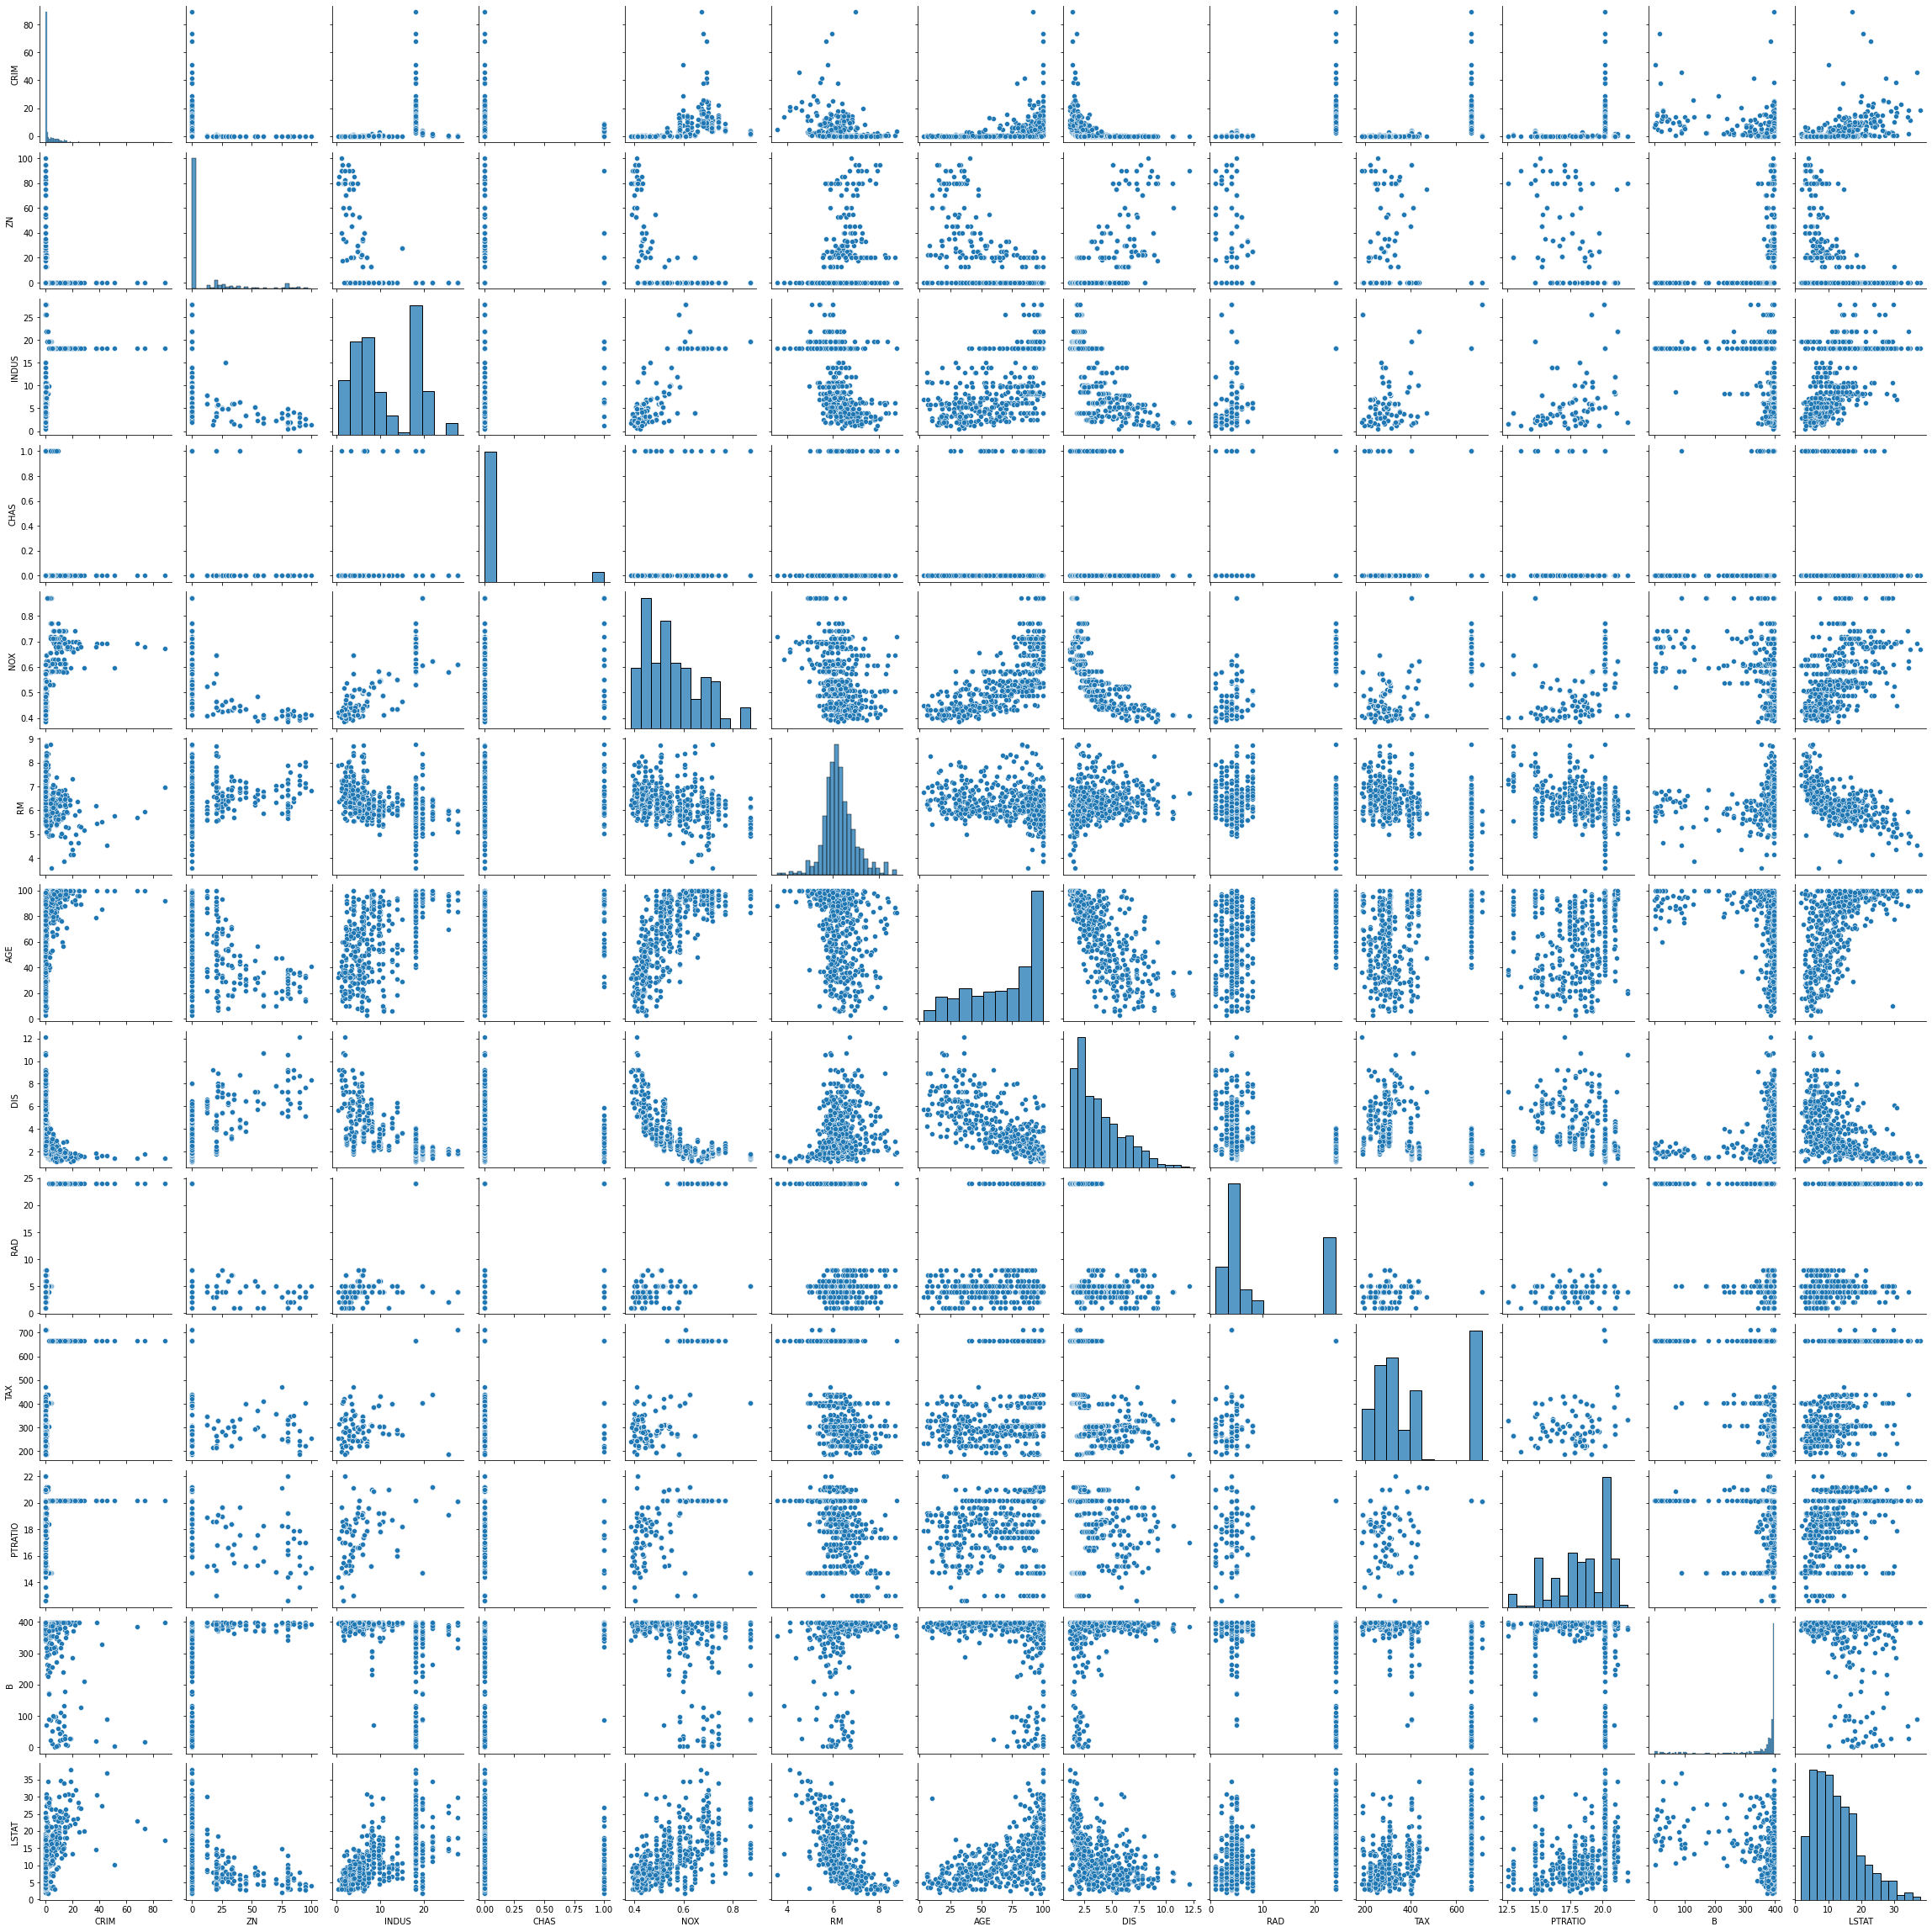

In [6]:
sns.pairplot(X);

<AxesSubplot:>

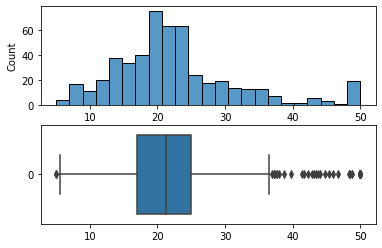

In [35]:
f, axes = plt.subplots(2, 1)

sns.histplot(y, ax=axes[0])
sns.boxplot(data=y, orient='h', ax=axes[1])



In [36]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7)

print('train samples:', len(X_train))
print('test samples', len(X_test))


train samples: 354
test samples 152


In [37]:
#import warnings
#warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [38]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [39]:
print('No coef:', len(lr.coef_))
print('Coefficients: \n', lr.coef_)

No coef: 13
Coefficients: 
 [-8.49704327e-02  3.68780357e-02  1.43273216e-02  1.84141617e+00
 -1.55263313e+01  5.00031565e+00 -1.09172283e-02 -1.35697360e+00
  2.65465661e-01 -1.31176682e-02 -9.01378907e-01  1.29778965e-02
 -4.17773304e-01]


In [40]:
predicted = lr.predict(X_test)

Text(0, 0.5, 'Predicted')

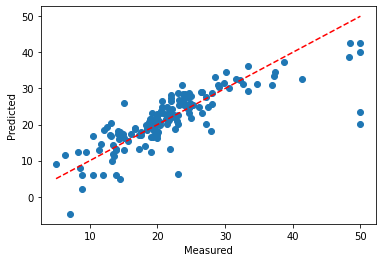

In [41]:
fig, ax = plt.subplots()
ax.scatter(y_test, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], ls='--', color='red')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

In [42]:
residual = (y_test - predicted)

Text(0, 0.5, 'residual')

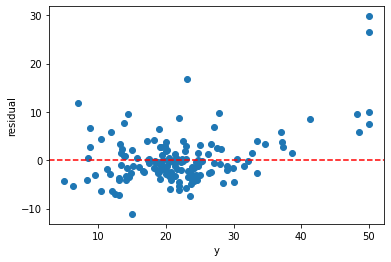

In [43]:
fig, ax = plt.subplots()
ax.scatter(y_test, residual)
plt.axhline(0, color='red', ls='--')
ax.set_xlabel('y')
ax.set_ylabel('residual')

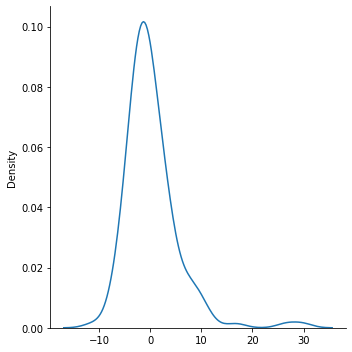

In [44]:
sns.displot(residual, kind="kde");

The trainig scores

In [45]:
metrics.r2_score(y_train, lr.predict(X_train))

0.7692238132450142

In [46]:
metrics.mean_squared_error(y_train, lr.predict(X_train))

20.361601457779884

In [47]:
metrics.r2_score(y_test, predicted)

0.6333909771667214

In [48]:
metrics.mean_squared_error(y_test, predicted)

27.545627033179198

In [49]:
print(lr.intercept_)
print(lr.coef_)

25.25192411940813
[-8.49704327e-02  3.68780357e-02  1.43273216e-02  1.84141617e+00
 -1.55263313e+01  5.00031565e+00 -1.09172283e-02 -1.35697360e+00
  2.65465661e-01 -1.31176682e-02 -9.01378907e-01  1.29778965e-02
 -4.17773304e-01]
